# Vision Transformers 
## Trabajo Práctico Final
### Noelia Qualindi - Matías Werbin

## Datasets
### Clasificación de tumores cerebrales

[Fuente Dataset](https://huggingface.co/datasets/sartajbhuvaji/Brain-Tumor-Classification/viewer/default/Training?f[label][value]=2)

El dataset utilizado está compuesto por tres bases de datos combinadas de imágenes relacionadas con el cáncer de mama, etiquetadas como:

0: Glioma Tumor

1: Meningioma Tumor

2: No Tumor

3: Pituitary Tumor

In [39]:
import matplotlib.pyplot as plt
from datasets import load_dataset, Dataset
import numpy as np
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader

In [3]:
# Cargar el dataset
dataset = load_dataset("sartajbhuvaji/Brain-Tumor-Classification")

train = dataset['Training']
test_dataset = dataset['Testing']

# Extraer etiquetas para la estratificación
labels = train['label']

# Generar índices estratificados
train_indices, val_indices = train_test_split(
    np.arange(len(labels)), 
    test_size=0.2, 
    stratify=labels, 
    random_state=42
)

# Dividir el conjunto original en entrenamiento y validación
train_dataset = train.select(train_indices)
val_dataset = train.select(val_indices)

# Comprobar tamaños
print("Tamaño del conjunto de entrenamiento:", len(train_dataset))
print("Tamaño del conjunto de validación:", len(val_dataset))
print("Tamaño del conjunto de prueba:", len(test_dataset))

Tamaño del conjunto de entrenamiento: 2296
Tamaño del conjunto de validación: 574
Tamaño del conjunto de prueba: 394


In [5]:
dataset

DatasetDict({
    Training: Dataset({
        features: ['image', 'label'],
        num_rows: 2870
    })
    Testing: Dataset({
        features: ['image', 'label'],
        num_rows: 394
    })
})

In [6]:
print(train_dataset)  
print(test_dataset)  

print(type(train_dataset))  
print(type(test_dataset))  

Dataset({
    features: ['image', 'label'],
    num_rows: 2296
})
Dataset({
    features: ['image', 'label'],
    num_rows: 394
})
<class 'datasets.arrow_dataset.Dataset'>
<class 'datasets.arrow_dataset.Dataset'>


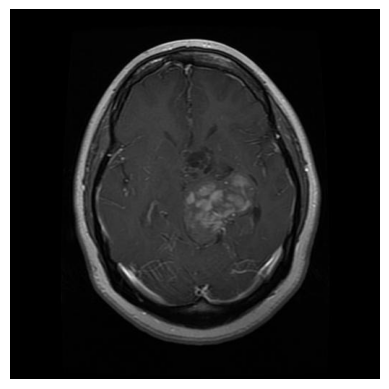

Image 1 info: {'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x177A87FD0>, 'label': 0}


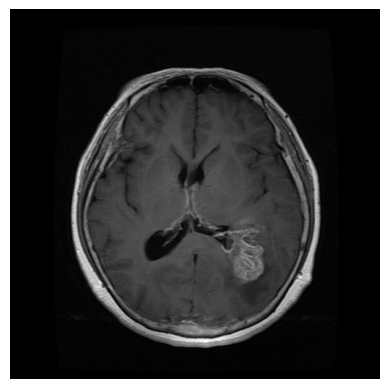

Image 2 info: {'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x177173F50>, 'label': 0}


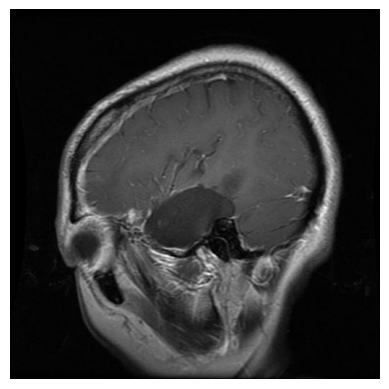

Image 3 info: {'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x1742157D0>, 'label': 0}


In [9]:
from PIL import Image

for i in range(3): 
    image_info = dataset['Training'][i]['image']

    if isinstance(image_info, Image.Image):
        image = image_info
    else:
        image = Image.open(image_info['src'])

    plt.imshow(image)
    plt.axis('off')
    plt.show()

    print(f"Image {i + 1} info:", dataset['Training'][i])

### Clases del Dataset

In [10]:
id2label = {id:label for id, label in enumerate(train_dataset.features['label'].names)}
label2id = {label:id for id,label in id2label.items()}
id2label

{0: 'glioma_tumor', 1: 'meningioma_tumor', 2: 'no_tumor', 3: 'pituitary_tumor'}

In [11]:
from collections import Counter

# Convertir las etiquetas de tensores a enteros antes de contarlas
train_labels = [int(example['label']) for example in train_dataset]
test_labels = [int(example['label']) for example in test_dataset]

print("Distribución en train:", Counter(train_labels))
print("Distribución en test:", Counter(test_labels))

Distribución en train: Counter({3: 662, 0: 661, 1: 657, 2: 316})
Distribución en test: Counter({1: 115, 2: 105, 0: 100, 3: 74})


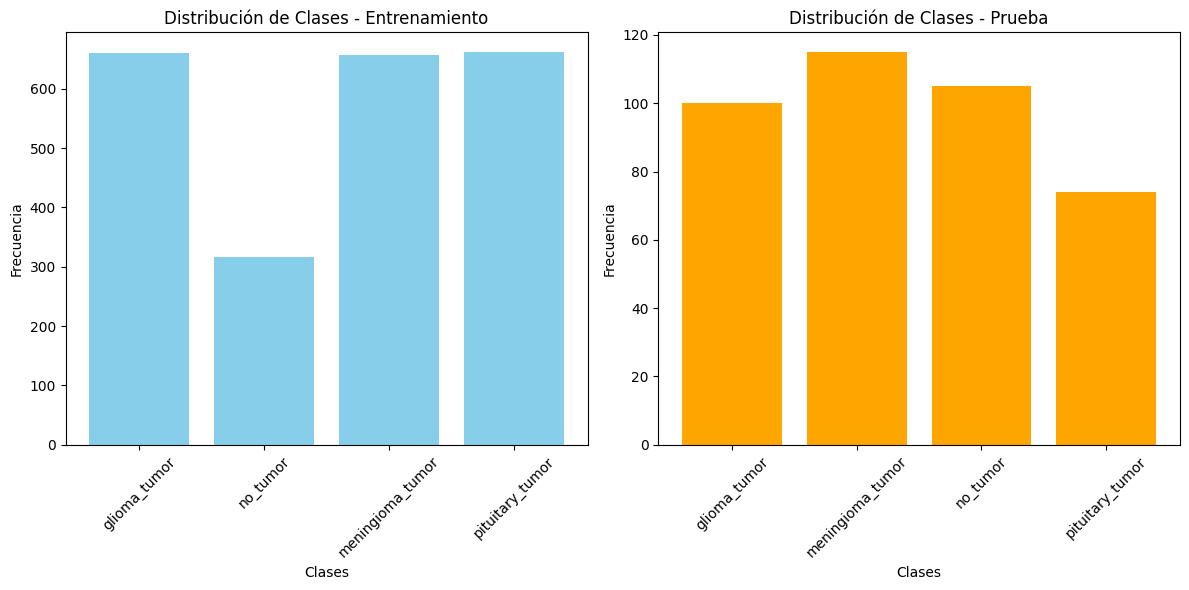

In [12]:
import matplotlib.pyplot as plt
from collections import Counter

# Contar la distribución de las clases en el conjunto de entrenamiento
train_labels = [int(example['label']) for example in train_dataset]  # Convertir a int
train_distribution = Counter(train_labels)

# Contar la distribución de las clases en el conjunto de prueba
test_labels = [int(example['label']) for example in test_dataset]  # Convertir a int
test_distribution = Counter(test_labels)

# Crear un mapa de etiquetas para mayor claridad
label_map = {
    0: "glioma_tumor",
    1: "meningioma_tumor",
    2: "no_tumor",
    3: "pituitary_tumor"
}

# Transformar las claves del Counter a nombres de clases
train_classes = [label_map[int(label)] for label in train_distribution.keys()]
train_counts = list(train_distribution.values())

test_classes = [label_map[int(label)] for label in test_distribution.keys()]
test_counts = list(test_distribution.values())

# Configurar gráfico
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de barras para el conjunto de entrenamiento
ax[0].bar(train_classes, train_counts, color='skyblue')
ax[0].set_title('Distribución de Clases - Entrenamiento')
ax[0].set_xlabel('Clases')
ax[0].set_ylabel('Frecuencia')
ax[0].set_xticks(range(len(train_classes)))
ax[0].set_xticklabels(train_classes, rotation=45)

# Gráfico de barras para el conjunto de prueba
ax[1].bar(test_classes, test_counts, color='orange')
ax[1].set_title('Distribución de Clases - Prueba')
ax[1].set_xlabel('Clases')
ax[1].set_ylabel('Frecuencia')
ax[1].set_xticks(range(len(test_classes)))
ax[1].set_xticklabels(test_classes, rotation=45)

plt.tight_layout()
plt.show()

### Set para CVT Model

In [13]:
train_dataset_cvt = train_dataset
test_dataset_cvt = test_dataset
val_dataset_cvt = val_dataset

### Set para Base ViT Google

In [60]:
train_dataset_g = train_dataset
test_dataset_g = test_dataset
val_dataset_g = val_dataset

### Set para Swin Transformer 

In [59]:
train_dataset_st = train_dataset
test_dataset_st = test_dataset
val_dataset_st = val_dataset

### Configuración del modelo CvT

In [15]:
from transformers import AutoFeatureExtractor, CvtForImageClassification, Trainer, TrainingArguments
import torch

feature_extractor = AutoFeatureExtractor.from_pretrained('microsoft/cvt-13')
model = CvtForImageClassification.from_pretrained('microsoft/cvt-13')


/opt/anaconda3/envs/mipy/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/opt/anaconda3/envs/mipy/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <2BD1B165-EC09-3F68-BCE4-8FE4E70CA7E2> /opt/anaconda3/envs/mipy/lib/python3.11/site-packages/torchvision/image.so
  Expected in:     <A51C8C05-245A-3989-8D3C-9A6704422CA5> /opt/anaconda3/envs/mipy/lib/python3.11/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/opt/anaconda3/envs/mipy/lib/python3.11/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta.

In [16]:
# Mover el modelo a GPU si está disponible
device = 'cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu'
print(device)
model.to(device)

mps


CvtForImageClassification(
  (cvt): CvtModel(
    (encoder): CvtEncoder(
      (stages): ModuleList(
        (0): CvtStage(
          (embedding): CvtEmbeddings(
            (convolution_embeddings): CvtConvEmbeddings(
              (projection): Conv2d(3, 64, kernel_size=(7, 7), stride=(4, 4), padding=(2, 2))
              (normalization): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
            )
            (dropout): Dropout(p=0.0, inplace=False)
          )
          (layers): Sequential(
            (0): CvtLayer(
              (attention): CvtAttention(
                (attention): CvtSelfAttention(
                  (convolution_projection_query): CvtSelfAttentionProjection(
                    (convolution_projection): CvtSelfAttentionConvProjection(
                      (convolution): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
                      (normalization): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tra

##  Preprocesamiento y transformación de las imágenes


In [17]:
print("Antes de aplicar las transformaciones:")
print(len(train_dataset_cvt)) 

Antes de aplicar las transformaciones:
2296


In [18]:
from PIL import Image
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomRotation(degrees=15),
    transforms.RandomResizedCrop(size=224, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor()
])

In [57]:
from datasets import load_dataset, concatenate_datasets
from torchvision import transforms
from PIL import Image
import random

# función de transformación para el aumento de datos (en memoria)
def augmented_train(example, feature_extractor):
    image = example['image']
    
    if image.mode != 'RGB':
        image = image.convert("RGB")
    
    augmented_image = train_transforms(image)
    
    inputs = feature_extractor(images=augmented_image, return_tensors="pt", padding=True, do_rescale=False)
    example['pixel_values'] = inputs['pixel_values'].squeeze().to(device)
    example['label'] = example['label']
    return example

def transform(example, feature_extractor):
    image = example['image']
    
    if image.mode != 'RGB':
        image = image.convert("RGB")
    
    inputs = feature_extractor(images=image, return_tensors="pt", padding=True, do_rescale=False)
    example['pixel_values'] = inputs['pixel_values'].squeeze().to(device)
    example['label'] = example['label']
    return example



In [20]:
augmented_cvt = train_dataset_cvt.map(lambda item: augmented_train(item, feature_extractor))

test_dataset_cvt = test_dataset_cvt.map(lambda item: transform(item, feature_extractor))
train_dataset_cvt = train_dataset_cvt.map(lambda item: transform(item, feature_extractor)) 
val_dataset_cvt = val_dataset_cvt.map(lambda item: transform(item, feature_extractor))
# Concatenar el conjunto de datos original con el aumentado
train_dataset_cvt = concatenate_datasets([train_dataset_cvt, augmented_cvt])

Map:   0%|          | 0/2296 [00:00<?, ? examples/s]/opt/anaconda3/envs/mipy/lib/python3.11/site-packages/transformers/image_processing_utils.py:41: UserWarning: The following named arguments are not valid for `ConvNextFeatureExtractor.preprocess` and were ignored: 'padding'
  return self.preprocess(images, **kwargs)
Map: 100%|██████████| 574/574 [00:10<00:00, 54.87 examples/s]


In [22]:
print(f"Tamaño del conjunto de entrenamiento después del aumento de datos: {len(train_dataset_cvt)}")
print(f"Tamaño del conjunto de validación: {len(val_dataset_cvt)}")
print(f"Tamaño del conjunto de prueba: {len(test_dataset_cvt)}")

Tamaño del conjunto de entrenamiento después del aumento de datos: 4592
Tamaño del conjunto de validación: 574
Tamaño del conjunto de prueba: 394


In [23]:
train_dataset_cvt.set_format(type='torch', columns=['pixel_values', 'label'])
val_dataset_cvt.set_format(type='torch', columns=['pixel_values', 'label'])
test_dataset_cvt.set_format(type='torch', columns=['pixel_values', 'label'])

In [24]:
print(train_dataset_cvt)

Dataset({
    features: ['image', 'label', 'pixel_values'],
    num_rows: 4592
})


In [25]:
from sklearn.metrics import accuracy_score, f1_score, recall_score

def compute_metrics(p):
    predictions, labels = p
    # Asegurarse de que las predicciones son logits, y obtener las clases más probables
    preds = torch.argmax(torch.tensor(predictions), axis=1)  # Predecir las clases
    labels = torch.tensor(labels)  # Asegurar que las etiquetas son tensores

    # Calcular las métricas
    accuracy = accuracy_score(labels.numpy(), preds.numpy())  # Accuracy
    f1 = f1_score(labels.numpy(), preds.numpy(), average='weighted')  # F1-score ponderado
    recall = recall_score(labels.numpy(), preds.numpy(), average='weighted')  # Recall ponderado
    
    # Regresar todas las métricas calculadas
    return {
        "accuracy": accuracy,
        "f1": f1,
        "recall": recall,
    }

In [26]:
import os
os.environ["WANDB_DISABLED"] = "true" # no utilizamos weights and biases

## Entrenamiento con fine-tuning

In [27]:
from transformers import TrainingArguments, Trainer

epochs = 10
learning_rate = 2e-5
batch_size_per_device = 16

class_names = {
    0: "glioma_tumor",
    1: "meningioma_tumor",
    2: "no_tumor",
    3: "pituitary_tumor"
}

training_args = TrainingArguments(
    output_dir="./results",  # Directorio para guardar los resultados
    evaluation_strategy="epoch",  # Evaluar al final de cada época
    save_strategy="epoch",  # Guardar el modelo al final de cada época
    logging_strategy="epoch",
    learning_rate=learning_rate,  # Tasa de aprendizaje
    per_device_train_batch_size=batch_size_per_device,  # Tamaño del batch para entrenamiento
    per_device_eval_batch_size=batch_size_per_device,  # Tamaño del batch para evaluación
    num_train_epochs=epochs,  # Número de épocas
    weight_decay=0.01,  # Regularización L2
    logging_dir="./logs",  # Directorio para los logs
    logging_steps=10,  # Intervalo de pasos para registrar logs
    load_best_model_at_end=True,  # Cargar el mejor modelo al final
    metric_for_best_model="accuracy",  # Métrica para evaluar el mejor modelo
)

In [28]:
trainer = Trainer(
    model=model,  # Modelo a entrenar
    args=training_args,  # Parámetros de entrenamiento
    train_dataset=train_dataset_cvt,  # Conjunto de entrenamiento
    eval_dataset=val_dataset_cvt,  # Conjunto de validación
    tokenizer=feature_extractor,  # Tokenizer o extractor de características
    compute_metrics=compute_metrics,  # Función de evaluación
)

/opt/anaconda3/envs/mipy/lib/python3.11/site-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
/var/folders/ml/g_sxsst10mj890krz6gpp0980000gn/T/ipykernel_82811/3214436591.py:19: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [29]:
train_results = trainer.train()

 10%|█         | 287/2870 [02:34<21:38,  1.99it/s]

{'loss': 3.1523, 'grad_norm': 133.3999481201172, 'learning_rate': 1.8e-05, 'epoch': 1.0}


                                                  
 10%|█         | 287/2870 [02:41<21:38,  1.99it/s]

{'eval_loss': 0.8077149391174316, 'eval_accuracy': 0.7073170731707317, 'eval_f1': 0.7044083037030155, 'eval_recall': 0.7073170731707317, 'eval_runtime': 6.7084, 'eval_samples_per_second': 85.564, 'eval_steps_per_second': 5.366, 'epoch': 1.0}


 20%|██        | 574/2870 [05:10<20:25,  1.87it/s]  

{'loss': 1.1754, 'grad_norm': 265.5242004394531, 'learning_rate': 1.6000000000000003e-05, 'epoch': 2.0}


                                                  
 20%|██        | 574/2870 [05:16<20:25,  1.87it/s]

{'eval_loss': 0.521224319934845, 'eval_accuracy': 0.7926829268292683, 'eval_f1': 0.7930413186486681, 'eval_recall': 0.7926829268292683, 'eval_runtime': 5.6679, 'eval_samples_per_second': 101.272, 'eval_steps_per_second': 6.352, 'epoch': 2.0}


 30%|███       | 861/2870 [07:47<18:06,  1.85it/s]  

{'loss': 0.8645, 'grad_norm': 97.42633056640625, 'learning_rate': 1.4e-05, 'epoch': 3.0}


                                                  
 30%|███       | 861/2870 [07:52<18:06,  1.85it/s]

{'eval_loss': 0.46796876192092896, 'eval_accuracy': 0.8240418118466899, 'eval_f1': 0.8240317011678377, 'eval_recall': 0.8240418118466899, 'eval_runtime': 5.7227, 'eval_samples_per_second': 100.302, 'eval_steps_per_second': 6.291, 'epoch': 3.0}


 40%|████      | 1148/2870 [10:28<14:49,  1.94it/s] 

{'loss': 0.8433, 'grad_norm': 132.46726989746094, 'learning_rate': 1.2e-05, 'epoch': 4.0}


                                                   
 40%|████      | 1148/2870 [10:33<14:49,  1.94it/s]

{'eval_loss': 0.4499412178993225, 'eval_accuracy': 0.8310104529616724, 'eval_f1': 0.8293476421040136, 'eval_recall': 0.8310104529616724, 'eval_runtime': 5.7921, 'eval_samples_per_second': 99.101, 'eval_steps_per_second': 6.215, 'epoch': 4.0}


 50%|█████     | 1435/2870 [13:05<11:38,  2.05it/s]  

{'loss': 0.75, 'grad_norm': 57.15482711791992, 'learning_rate': 1e-05, 'epoch': 5.0}


                                                   
 50%|█████     | 1435/2870 [13:10<11:38,  2.05it/s]

{'eval_loss': 0.4259687066078186, 'eval_accuracy': 0.8344947735191638, 'eval_f1': 0.8322147148059503, 'eval_recall': 0.8344947735191638, 'eval_runtime': 5.3636, 'eval_samples_per_second': 107.018, 'eval_steps_per_second': 6.712, 'epoch': 5.0}


 60%|██████    | 1722/2870 [15:42<09:55,  1.93it/s]

{'loss': 0.7303, 'grad_norm': 54.297908782958984, 'learning_rate': 8.000000000000001e-06, 'epoch': 6.0}


                                                   
 60%|██████    | 1722/2870 [15:47<09:55,  1.93it/s]

{'eval_loss': 0.48117595911026, 'eval_accuracy': 0.8292682926829268, 'eval_f1': 0.8282083354697497, 'eval_recall': 0.8292682926829268, 'eval_runtime': 5.4786, 'eval_samples_per_second': 104.771, 'eval_steps_per_second': 6.571, 'epoch': 6.0}


 70%|███████   | 2009/2870 [18:17<07:18,  1.96it/s]

{'loss': 0.7013, 'grad_norm': 46.586769104003906, 'learning_rate': 6e-06, 'epoch': 7.0}


                                                   
 70%|███████   | 2009/2870 [18:23<07:18,  1.96it/s]

{'eval_loss': 0.39135295152664185, 'eval_accuracy': 0.8205574912891986, 'eval_f1': 0.8143466429524296, 'eval_recall': 0.8205574912891986, 'eval_runtime': 5.742, 'eval_samples_per_second': 99.965, 'eval_steps_per_second': 6.27, 'epoch': 7.0}


 80%|████████  | 2296/2870 [20:55<05:06,  1.87it/s]

{'loss': 0.6834, 'grad_norm': 137.60440063476562, 'learning_rate': 4.000000000000001e-06, 'epoch': 8.0}


                                                   
 80%|████████  | 2296/2870 [21:01<05:06,  1.87it/s]

{'eval_loss': 0.3996467590332031, 'eval_accuracy': 0.8536585365853658, 'eval_f1': 0.8531528593185012, 'eval_recall': 0.8536585365853658, 'eval_runtime': 5.4423, 'eval_samples_per_second': 105.47, 'eval_steps_per_second': 6.615, 'epoch': 8.0}


 90%|█████████ | 2583/2870 [23:34<02:19,  2.06it/s]

{'loss': 0.6825, 'grad_norm': 254.84799194335938, 'learning_rate': 2.0000000000000003e-06, 'epoch': 9.0}


                                                   
 90%|█████████ | 2583/2870 [23:39<02:19,  2.06it/s]

{'eval_loss': 0.3744327127933502, 'eval_accuracy': 0.8745644599303136, 'eval_f1': 0.8738582455671867, 'eval_recall': 0.8745644599303136, 'eval_runtime': 5.3882, 'eval_samples_per_second': 106.529, 'eval_steps_per_second': 6.681, 'epoch': 9.0}


100%|██████████| 2870/2870 [26:17<00:00,  1.97it/s]

{'loss': 0.6537, 'grad_norm': 37.91458511352539, 'learning_rate': 0.0, 'epoch': 10.0}


                                                   
100%|██████████| 2870/2870 [26:22<00:00,  1.97it/s]

{'eval_loss': 0.3659678101539612, 'eval_accuracy': 0.8693379790940766, 'eval_f1': 0.8695248003382784, 'eval_recall': 0.8693379790940766, 'eval_runtime': 5.7331, 'eval_samples_per_second': 100.12, 'eval_steps_per_second': 6.279, 'epoch': 10.0}


100%|██████████| 2870/2870 [26:25<00:00,  1.81it/s]

{'train_runtime': 1585.2813, 'train_samples_per_second': 28.966, 'train_steps_per_second': 1.81, 'train_loss': 1.0236623571309478, 'epoch': 10.0}


In [30]:
torch.save(model.state_dict(), 'modelo_entrenado_cvt_fine_tuning.pth')

In [31]:
torch.mps.empty_cache() 

In [53]:
print("=== Métricas de Entrenamiento ===")
print(train_results.metrics)

=== Métricas de Entrenamiento ===
{'train_runtime': 1585.2813, 'train_samples_per_second': 28.966, 'train_steps_per_second': 1.81, 'total_flos': 8.293649780441088e+17, 'train_loss': 1.0236623571309478, 'epoch': 10.0}


### Evaluación del modelo con Fine-Tuning

In [41]:
from sklearn.metrics import classification_report

def evaluate_model(model, test_dataset, batch_size_per_device=8, device='cuda'):
    test_loader = DataLoader(test_dataset, batch_size=batch_size_per_device)

    model.eval() 
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in test_loader:
            pixel_values = batch['pixel_values'].squeeze(1).float()
            outputs = model(pixel_values=pixel_values.to(device))  # Forward pass
            predictions = torch.argmax(outputs.logits, dim=-1)
            
            # Almacenar las predicciones y etiquetas reales
            all_preds.extend(predictions.cpu().numpy()) 
            all_labels.extend(batch['label'].cpu().numpy())

    # Imprimir el classification report
    print(classification_report(all_labels, all_preds, digits=4))

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_predictions(test_dataset, predictions, class_names, num_samples=15, rows=3, cols=5):
    """
    Función para mostrar imágenes de un dataset con sus etiquetas verdaderas y predicciones.
    
    Parameters:
    - test_dataset: Dataset de prueba.
    - predictions: Resultados de las predicciones del modelo (con `trainer.predict()`).
    - class_names: Diccionario que mapea las etiquetas numéricas a nombres de clase.
    - num_samples: Número de imágenes a mostrar.
    - rows: Número de filas en la figura.
    - cols: Número de columnas en la figura.
    """
    predicted_labels = torch.argmax(torch.tensor(predictions.predictions), dim=-1)
    
    random_indices = random.sample(range(len(test_dataset)), num_samples)
    
    fig, axes = plt.subplots(rows, cols, figsize=(15, 10))  # Tamaño de la figura
    axes = axes.flatten()

    for idx, ax in zip(random_indices, axes):
        sample = test_dataset[idx]
        image = sample['pixel_values']
        true_label = int(sample['label']) 
        
        true_label_name = class_names[true_label]
        pred_label_name = class_names[predicted_labels[idx].item()]
        
        # Ajusta la imagen a formato [H, W, C]
        image = image.permute(1, 2, 0).numpy()  # cambia de [C, H, W] a [H, W, C]
        
        # Normalizar la imagen si es necesario
        if image.max() > 1 or image.min() < 0:
            image = (image - image.min()) / (image.max() - image.min())  # normalizar entre 0 y 1
        
        ax.imshow(image)
        ax.axis('off')
        ax.set_title(f"True: {true_label_name}\nPred: {pred_label_name}", fontsize=10)

    plt.tight_layout()
    plt.show()


def plot_confusion_matrix(predictions, class_names):
    # Obtener las etiquetas verdaderas y las predicciones
    y_true = predictions.label_ids
    y_pred = predictions.predictions.argmax(axis=1)
    
    # Calcular la matriz de confusión
    cm = confusion_matrix(y_true, y_pred)
    
    # Etiquetas para las clases
    labels = [class_names[i] for i in range(len(class_names))]
    
    # Crear la visualización de la matriz de confusión
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    
    # Mostrar la matriz de confusión
    disp.plot(cmap='plasma', xticks_rotation=45)
    plt.title("Matriz de Confusión")
    plt.show()


In [54]:
eval_results_cvt = trainer.evaluate()
# Evaluar en el conjunto de validación
print("=== Métricas de Evaluación ===")
print(f"Accuracy en la evaluación lograda con el conjunto de validación: {eval_results_cvt['eval_accuracy']}")

100%|██████████| 36/36 [00:05<00:00,  6.98it/s]

=== Métricas de Evaluación ===
Accuracy en la evaluación lograda con el conjunto de validación: 0.8745644599303136


### Métricas para Test

In [47]:
evaluate_model(model, test_dataset_cvt, batch_size_per_device, device)

              precision    recall  f1-score   support

           0     0.8750    0.2100    0.3387       100
           1     0.5922    0.5304    0.5596       115
           2     0.4367    0.9524    0.5988       105
           3     0.8158    0.4189    0.5536        74

    accuracy                         0.5406       394
   macro avg     0.6799    0.5279    0.5127       394
weighted avg     0.6645    0.5406    0.5129       394



### Pruebas 

100%|██████████| 25/25 [00:03<00:00,  6.75it/s]


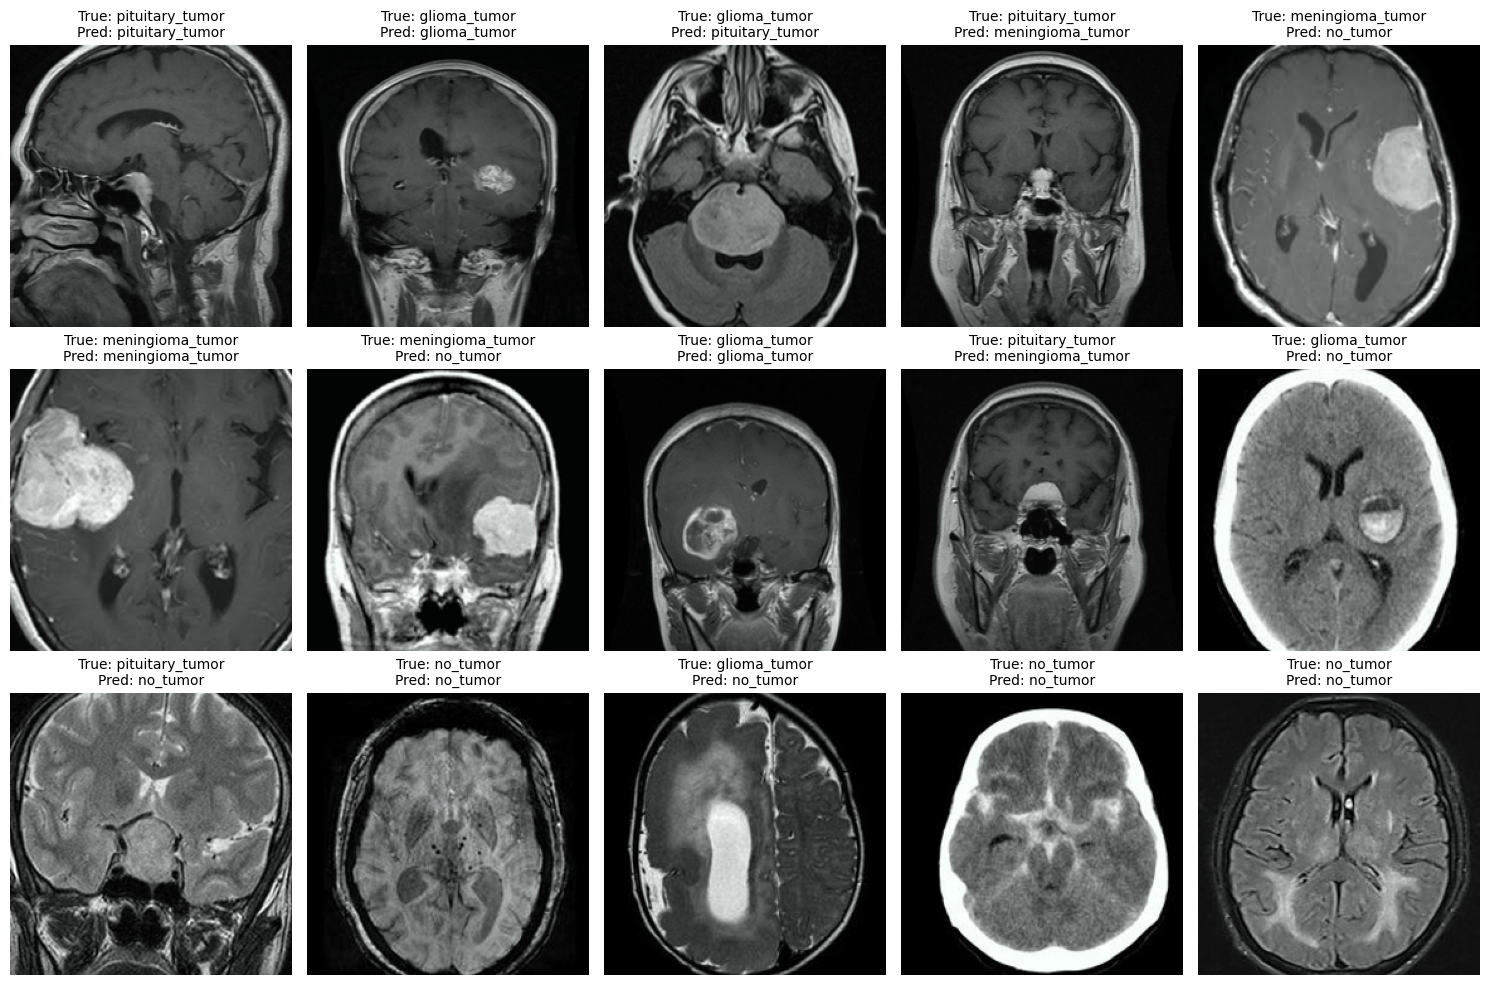

In [48]:
predictions_cvt = trainer.predict(test_dataset_cvt)
predicted_labels_cvt = torch.argmax(torch.tensor(predictions_cvt.predictions), dim=-1)

plot_predictions(test_dataset_cvt, predictions_cvt, class_names)

In [49]:
predictions_cvt.metrics

{'test_loss': 1.9361610412597656,
 'test_accuracy': 0.5406091370558376,
 'test_f1': 0.5128611754273218,
 'test_recall': 0.5406091370558376,
 'test_runtime': 4.1621,
 'test_samples_per_second': 94.664,
 'test_steps_per_second': 6.007}

### Matriz de confusión

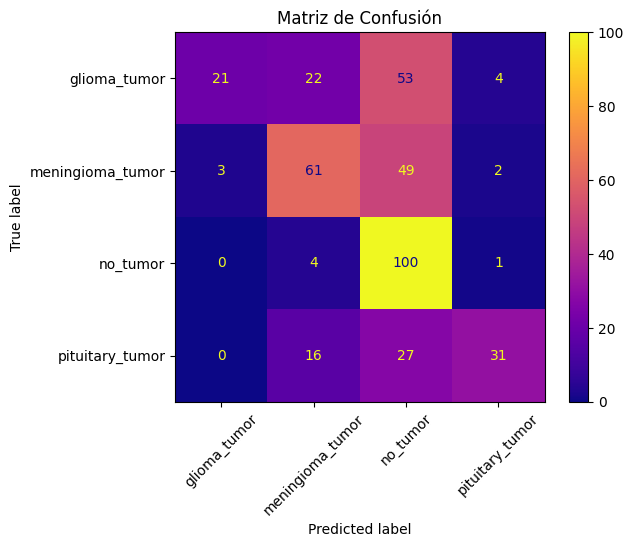

In [52]:
plot_confusion_matrix(predictions_cvt, class_names)

## Base ViT (Google)

In [55]:
from transformers import ViTImageProcessor, ViTForImageClassification

feature_extractor_g = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224")
model_g = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224")

In [56]:
model_g.to(device)

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTSdpaAttention(
            (attention): ViTSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_fe

In [61]:
augmented_g = train_dataset_g.map(lambda item: augmented_train(item, feature_extractor_g))

test_dataset_g = test_dataset_g.map(lambda item: transform(item, feature_extractor_g))
val_dataset_g = val_dataset_g.map(lambda item: transform(item, feature_extractor_g))
train_dataset_g = train_dataset_g.map(lambda item: transform(item, feature_extractor_g))

# Concatenar el conjunto de datos original con el aumentado
train_dataset_g = concatenate_datasets([train_dataset_g, augmented_g])

Map:   0%|          | 0/394 [00:00<?, ? examples/s]/opt/anaconda3/envs/mipy/lib/python3.11/site-packages/transformers/image_processing_utils.py:41: UserWarning: The following named arguments are not valid for `ViTImageProcessor.preprocess` and were ignored: 'padding'
  return self.preprocess(images, **kwargs)
Map: 100%|██████████| 2296/2296 [00:46<00:00, 49.91 examples/s]


In [62]:
print(f"Tamaño del conjunto de entrenamiento después del aumento de datos: {len(train_dataset_g)}")
print(f"Tamaño del conjunto de validación: {len(val_dataset_g)}")
print(f"Tamaño del conjunto de prueba: {len(test_dataset_g)}")

Tamaño del conjunto de entrenamiento después del aumento de datos: 4592
Tamaño del conjunto de validación: 574
Tamaño del conjunto de prueba: 394


In [63]:
train_dataset_g.set_format(type='torch', columns=['pixel_values', 'label'])
val_dataset_g.set_format(type='torch', columns=['pixel_values', 'label'])
test_dataset_g.set_format(type='torch', columns=['pixel_values', 'label'])

In [64]:
print(train_dataset_g)

Dataset({
    features: ['image', 'label', 'pixel_values'],
    num_rows: 4592
})


In [65]:
trainer_g = Trainer(
    model=model_g,  # Modelo a entrenar
    args=training_args,  # Parámetros de entrenamiento
    train_dataset=train_dataset_g,  # Conjunto de entrenamiento
    eval_dataset=val_dataset_g,  # Conjunto de validación
    tokenizer=feature_extractor_g,  # Tokenizer o extractor de características
    compute_metrics=compute_metrics,  # Función de evaluación
)

/var/folders/ml/g_sxsst10mj890krz6gpp0980000gn/T/ipykernel_82811/75566769.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer_g = Trainer(


In [66]:
trainer_g_results = trainer_g.train()

  0%|          | 0/2870 [00:00<?, ?it/s]

 10%|█         | 287/2870 [03:52<32:30,  1.32it/s]

{'loss': 1.5779, 'grad_norm': 118.0350341796875, 'learning_rate': 1.8e-05, 'epoch': 1.0}



 10%|█         | 287/2870 [04:03<32:30,  1.32it/s]

{'eval_loss': 1.0000718832015991, 'eval_accuracy': 0.5749128919860628, 'eval_f1': 0.5380530299129362, 'eval_recall': 0.5749128919860628, 'eval_runtime': 10.9984, 'eval_samples_per_second': 52.19, 'eval_steps_per_second': 3.273, 'epoch': 1.0}


 20%|██        | 574/2870 [07:41<28:11,  1.36it/s]  

{'loss': 0.5669, 'grad_norm': 805.7055053710938, 'learning_rate': 1.6000000000000003e-05, 'epoch': 2.0}



 20%|██        | 574/2870 [07:52<28:11,  1.36it/s]

{'eval_loss': 0.82784503698349, 'eval_accuracy': 0.6480836236933798, 'eval_f1': 0.6497414725369595, 'eval_recall': 0.6480836236933798, 'eval_runtime': 10.8293, 'eval_samples_per_second': 53.004, 'eval_steps_per_second': 3.324, 'epoch': 2.0}


 30%|███       | 861/2870 [11:26<23:22,  1.43it/s]  

{'loss': 0.434, 'grad_norm': 170.71466064453125, 'learning_rate': 1.4e-05, 'epoch': 3.0}



 30%|███       | 861/2870 [11:36<23:22,  1.43it/s]

{'eval_loss': 0.694048285484314, 'eval_accuracy': 0.7421602787456446, 'eval_f1': 0.7385515695328065, 'eval_recall': 0.7421602787456446, 'eval_runtime': 9.7359, 'eval_samples_per_second': 58.957, 'eval_steps_per_second': 3.698, 'epoch': 3.0}


 40%|████      | 1148/2870 [15:04<21:04,  1.36it/s] 

{'loss': 0.3907, 'grad_norm': 41.882057189941406, 'learning_rate': 1.2e-05, 'epoch': 4.0}



 40%|████      | 1148/2870 [15:15<21:04,  1.36it/s]

{'eval_loss': 0.6786361932754517, 'eval_accuracy': 0.7386759581881533, 'eval_f1': 0.7461051742263304, 'eval_recall': 0.7386759581881533, 'eval_runtime': 10.4306, 'eval_samples_per_second': 55.031, 'eval_steps_per_second': 3.451, 'epoch': 4.0}


 50%|█████     | 1435/2870 [18:46<16:53,  1.42it/s]  

{'loss': 0.3489, 'grad_norm': 524.9801025390625, 'learning_rate': 1e-05, 'epoch': 5.0}



 50%|█████     | 1435/2870 [18:57<16:53,  1.42it/s]

{'eval_loss': 0.6579709649085999, 'eval_accuracy': 0.7700348432055749, 'eval_f1': 0.765707314203539, 'eval_recall': 0.7700348432055749, 'eval_runtime': 10.3835, 'eval_samples_per_second': 55.28, 'eval_steps_per_second': 3.467, 'epoch': 5.0}


 60%|██████    | 1722/2870 [22:25<13:35,  1.41it/s]  

{'loss': 0.2926, 'grad_norm': 658.5289306640625, 'learning_rate': 8.000000000000001e-06, 'epoch': 6.0}



 60%|██████    | 1722/2870 [22:35<13:35,  1.41it/s]

{'eval_loss': 0.5878684520721436, 'eval_accuracy': 0.7682926829268293, 'eval_f1': 0.7542894198807757, 'eval_recall': 0.7682926829268293, 'eval_runtime': 10.188, 'eval_samples_per_second': 56.341, 'eval_steps_per_second': 3.534, 'epoch': 6.0}


 70%|███████   | 2009/2870 [26:03<10:08,  1.41it/s]  

{'loss': 0.2501, 'grad_norm': 348.32891845703125, 'learning_rate': 6e-06, 'epoch': 7.0}



 70%|███████   | 2009/2870 [26:13<10:08,  1.41it/s]

{'eval_loss': 0.528950572013855, 'eval_accuracy': 0.7874564459930313, 'eval_f1': 0.7902383247870335, 'eval_recall': 0.7874564459930313, 'eval_runtime': 9.9662, 'eval_samples_per_second': 57.595, 'eval_steps_per_second': 3.612, 'epoch': 7.0}


 80%|████████  | 2296/2870 [29:40<06:42,  1.43it/s]  

{'loss': 0.2227, 'grad_norm': 517.445068359375, 'learning_rate': 4.000000000000001e-06, 'epoch': 8.0}



 80%|████████  | 2296/2870 [29:50<06:42,  1.43it/s]

{'eval_loss': 0.5058793425559998, 'eval_accuracy': 0.7961672473867596, 'eval_f1': 0.7879089299467674, 'eval_recall': 0.7961672473867596, 'eval_runtime': 9.9986, 'eval_samples_per_second': 57.408, 'eval_steps_per_second': 3.6, 'epoch': 8.0}


 90%|█████████ | 2583/2870 [33:20<03:29,  1.37it/s]

{'loss': 0.1985, 'grad_norm': 306.4830322265625, 'learning_rate': 2.0000000000000003e-06, 'epoch': 9.0}



 90%|█████████ | 2583/2870 [33:30<03:29,  1.37it/s]

{'eval_loss': 0.5106233358383179, 'eval_accuracy': 0.8066202090592335, 'eval_f1': 0.8088914563134064, 'eval_recall': 0.8066202090592335, 'eval_runtime': 10.2392, 'eval_samples_per_second': 56.059, 'eval_steps_per_second': 3.516, 'epoch': 9.0}


100%|██████████| 2870/2870 [37:04<00:00,  1.38it/s]

{'loss': 0.1815, 'grad_norm': 8.001798629760742, 'learning_rate': 0.0, 'epoch': 10.0}



100%|██████████| 2870/2870 [37:15<00:00,  1.38it/s]

{'eval_loss': 0.48943623900413513, 'eval_accuracy': 0.8222996515679443, 'eval_f1': 0.8203341663841328, 'eval_recall': 0.8222996515679443, 'eval_runtime': 11.5805, 'eval_samples_per_second': 49.566, 'eval_steps_per_second': 3.109, 'epoch': 10.0}


100%|██████████| 2870/2870 [37:17<00:00,  1.28it/s]

{'train_runtime': 2237.6434, 'train_samples_per_second': 20.522, 'train_steps_per_second': 1.283, 'train_loss': 0.4463636272044963, 'epoch': 10.0}


In [67]:
eval_results_g = trainer_g.evaluate()
# Evaluar en el conjunto de validación
print("=== Métricas de Evaluación ===")
print(f"Accuracy en la evaluación lograda con el conjunto de validación: {eval_results_g['eval_accuracy']}")

100%|██████████| 36/36 [00:09<00:00,  3.93it/s]

=== Métricas de Evaluación ===
Accuracy en la evaluación lograda con el conjunto de validación: 0.8222996515679443


In [69]:
evaluate_model(model_g, test_dataset_g, batch_size_per_device, device)

              precision    recall  f1-score   support

           0     0.7895    0.1500    0.2521       100
           1     0.5106    0.2087    0.2963       115
           2     0.3411    0.9714    0.5050       105
           3     0.5862    0.2297    0.3301        74

    accuracy                         0.4010       394
   macro avg     0.5569    0.3900    0.3459       394
weighted avg     0.5504    0.4010    0.3470       394



100%|██████████| 25/25 [00:06<00:00,  4.05it/s]


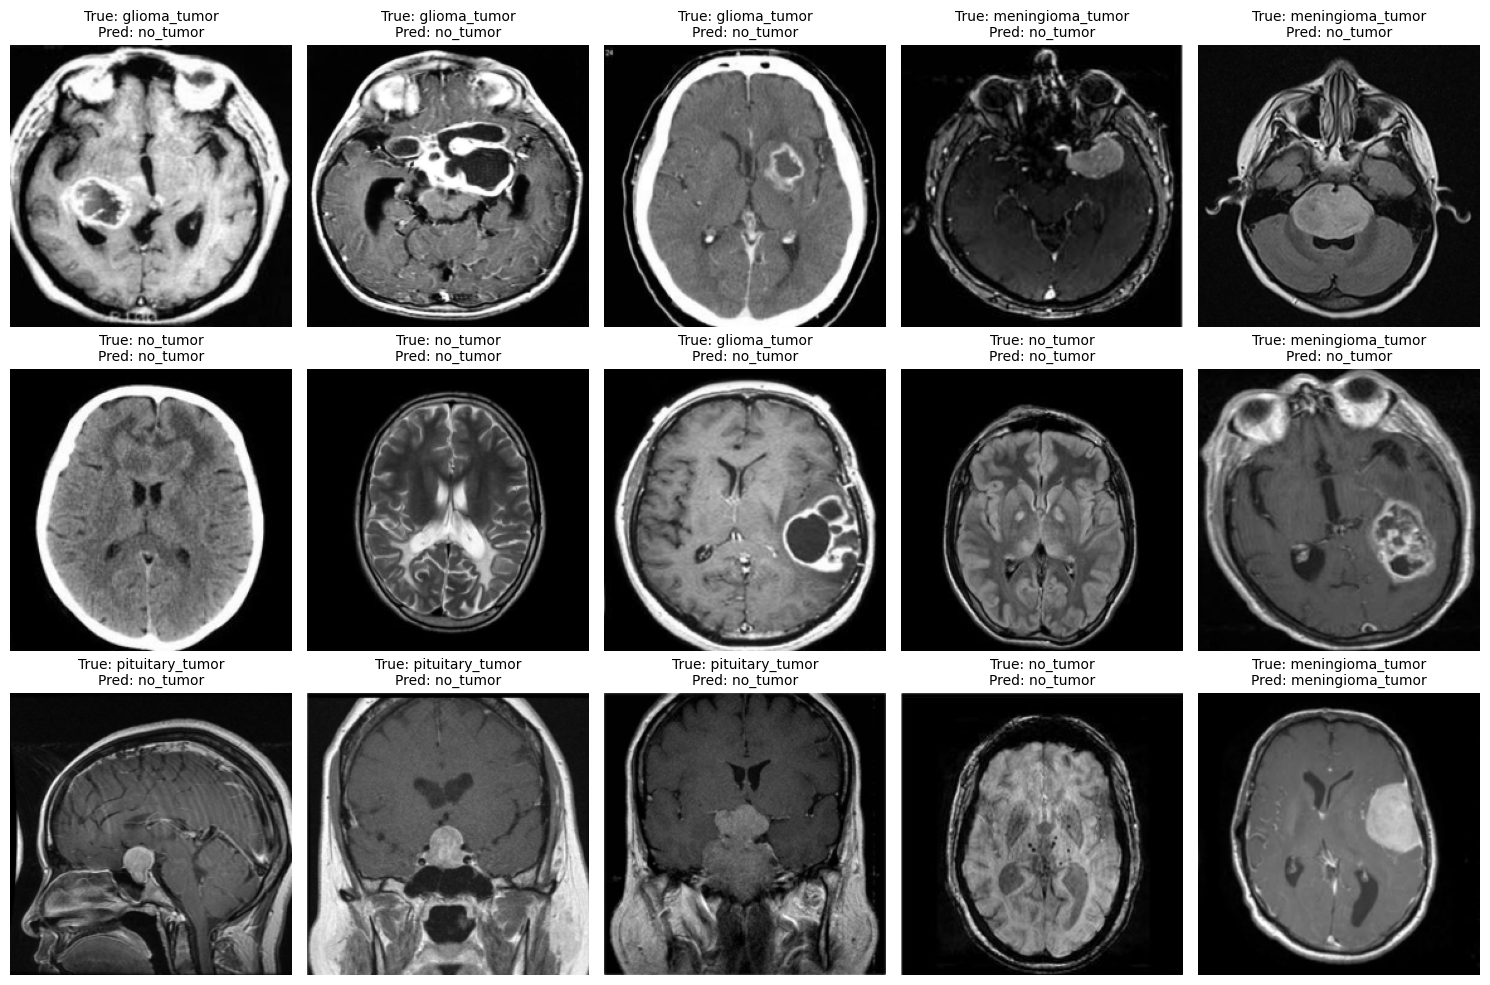

In [73]:
predictions_g = trainer_g.predict(test_dataset_cvt)
predicted_labels_g = torch.argmax(torch.tensor(predictions_g.predictions), dim=-1)

plot_predictions(test_dataset_g, predictions_g, class_names)

In [74]:
predictions_g.metrics

{'test_loss': 2.4704504013061523,
 'test_accuracy': 0.3096446700507614,
 'test_f1': 0.2119932682639311,
 'test_recall': 0.3096446700507614,
 'test_runtime': 7.0382,
 'test_samples_per_second': 55.98,
 'test_steps_per_second': 3.552}

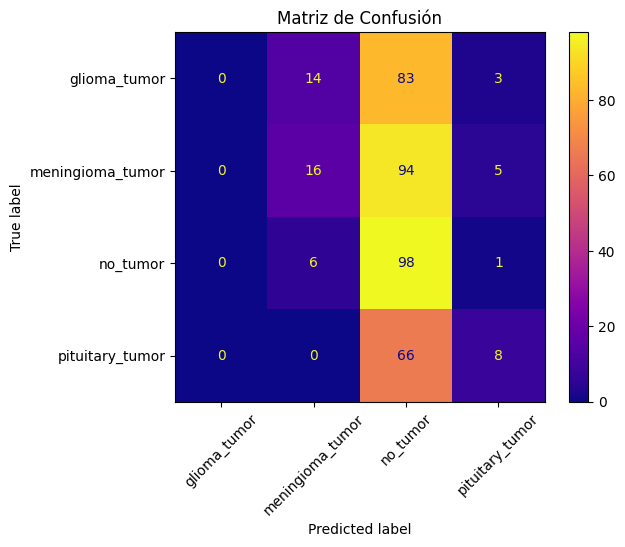

In [75]:
plot_confusion_matrix(predictions_g, class_names)